# An Analysis of Ariana Grande Tracks
## Ben Rosenberg
## 7/3/2021


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')

In [2]:
track_data = pd.read_csv("ari_data.csv")

## About the data

The data are composed of around 90 to 95 different Ariana Grande tracks, from 11 different albums. As can be seen below, the features include `Title`, `Album`, `Date` (release year), `BPM`, and `Objective Rating`. The last of these categories was handcrafted by your truly (me, not the song). 

In [50]:
track_data.head()

,Title,Album,Date,BPM,Objective Rating
0,Honeymoon Avenue,Yours Truly,2013,125,5
1,Baby I,Yours Truly,2013,102,7
2,Right There,Yours Truly,2013,156,4
3,Tattooed Heart,Yours Truly,2013,72,5
4,Lovin' It,Yours Truly,2013,94,6


## BPM

We'll start with an analysis of BPM. Investigating a possible relationship between `BPM` and `Objective Rating` produces no significant results:

Text(0.5, 1.0, 'Objective Ratings by BPM')

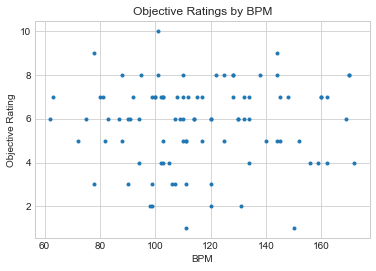

In [151]:
plt.plot(track_data["BPM"], track_data["Objective Rating"], '.')
plt.xlabel("BPM")
plt.ylabel("Objective Rating")
plt.title("Objective Ratings by BPM")

It appears that `BPM` is relatively normally distributed. Not much to report here.

Text(0.5, 1.0, 'Track BPM')

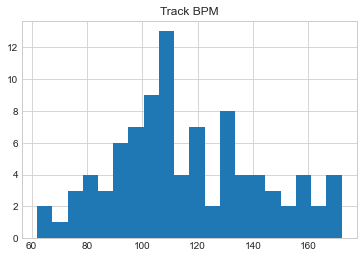

In [165]:
plt.hist(track_data["BPM"], bins=20)
plt.title("Track BPM")

## Objective Rating

Now let's move onto analyzing the data by `Objective Rating`. First, we'll look at the average `Objective Rating`s of each album:

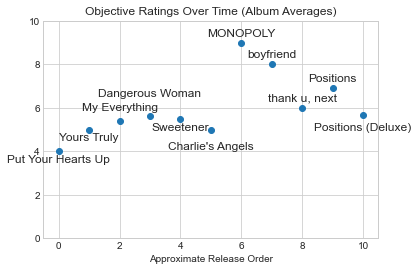

In [166]:
albums = track_data.groupby(["Album"], as_index = False).mean().sort_values(by="Date")
fig, ax = plt.subplots()
ax.scatter(list(range(albums["Objective Rating"].size)), albums["Objective Rating"])
ax.set_ylim(0,10)
plt.xlabel("Approximate Release Order")
plt.title("Objective Ratings Over Time (Album Averages)")

# yeah this is cringe
y_coords = [j + 0.2 for j in albums["Objective Rating"].reset_index(drop=True)]
y_coords[0] -= 0.8
y_coords[1] -= 0.8
y_coords[2] += 0.2
y_coords[3] += 0.6
y_coords[4] -= 0.8
y_coords[5] -= 1.2
y_coords[-1] -= 1

for i, txt in enumerate(albums["Album"]):
    ax.annotate(txt, (list(range(albums["Objective Rating"].size))[i], y_coords[i]), ha="center", va="bottom", size=12)

There are some obvious outliers here -- the "albums" *MONOPOLY*, *boyfriend*, and *Put Your Hearts Up* are just singles, which is why *MONOPOLY* and *boyfriend* manage to have such high ratings (and *Put Your Hearts Up* manages to suck). Similarly, *Charlie's Angels* is essentially a single (the data have only one track from said album). *Positions (Deluxe)* is another smaller album in our data, as repeats from *Positions* were not double-counted.

In [170]:
track_counts = track_data.groupby(["Album"]).count()
small_albums = track_counts[track_counts["Title"] < 5]

small_albums

,Title,Date,BPM,Objective Rating
Album,,,,
Charlie's Angels,1,1,1,1
MONOPOLY,1,1,1,1
Positions (Deluxe),3,3,3,3
Put Your Hearts Up,1,1,1,1
boyfriend,1,1,1,1


Now let's look at the `Objective Rating`s by track:

Text(0.5, 1.0, 'Objective Ratings By Track')

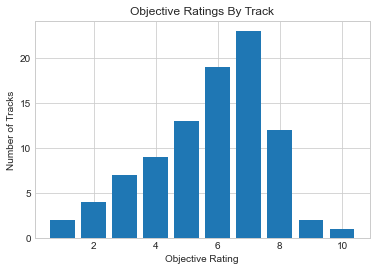

In [138]:
plt.bar(list(range(1,11)), track_data.groupby(by=["Objective Rating"]).count()["Title"])
plt.xlabel("Objective Rating")
plt.ylabel("Number of Tracks")
plt.title("Objective Ratings By Track")


These ratings appear to be reasonably distributed, if a little left-skewed. Notably, some tracks are awful:

In [147]:
track_data.sort_values(by="Objective Rating").head(6)


,Title,Album,Date,BPM,Objective Rating
42,Step On Up,Dangerous Woman,2016,111,1
24,Bang Bang,My Everything,2014,150,1
10,Popular Song,Yours Truly,2013,99,2
22,Hands On Me,My Everything,2014,98,2
49,sweetener,Sweetener,2018,120,2
35,Everyday,Dangerous Woman,2016,131,2


...while some were bangers:

In [148]:
track_data.sort_values(by="Objective Rating", ascending=False).head(3)

,Title,Album,Date,BPM,Objective Rating
25,Only 1,My Everything,2014,101,10
89,MONOPOLY,MONOPOLY,2019,144,9
36,Sometimes,Dangerous Woman,2016,78,9


That's the end of this phase of the analysis. In the next phase, we'll look at lyrics and maybe other features.